# **1. Import Library**

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

In [76]:
df = pd.read_csv('BankChurners_Clustered.csv')
df.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Single,Marital_Status_Unknown,KMeans_Cluster
0,0.340426,1.0,0.418605,0.8,0.500000,0.333333,0.160522,0.582837,0.152928,0.244628,0.038444,0.248062,0.183091,0.217217,1,0,1,0
1,0.659574,0.4,0.813953,0.8,0.333333,0.333333,0.030162,0.270163,0.050792,0.350309,0.058974,0.147287,0.164513,0.279279,0,0,0,1
2,0.765957,0.0,0.837209,0.2,0.500000,0.500000,0.000000,0.000000,0.041587,0.308213,0.010126,0.046512,0.161551,0.000000,0,0,0,1
3,0.446809,0.8,0.534884,0.4,0.500000,0.333333,0.031855,0.619785,0.026917,0.168678,0.034272,0.100775,0.095046,0.626627,0,1,0,3
4,0.595745,0.4,0.674419,0.6,0.333333,0.500000,0.325860,0.000000,0.353896,0.316456,0.033382,0.085271,0.201939,0.000000,1,0,0,0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              5909 non-null   float64
 1   Dependent_count           5909 non-null   float64
 2   Months_on_book            5909 non-null   float64
 3   Total_Relationship_Count  5909 non-null   float64
 4   Months_Inactive_12_mon    5909 non-null   float64
 5   Contacts_Count_12_mon     5909 non-null   float64
 6   Credit_Limit              5909 non-null   float64
 7   Total_Revolving_Bal       5909 non-null   float64
 8   Avg_Open_To_Buy           5909 non-null   float64
 9   Total_Amt_Chng_Q4_Q1      5909 non-null   float64
 10  Total_Trans_Amt           5909 non-null   float64
 11  Total_Trans_Ct            5909 non-null   float64
 12  Total_Ct_Chng_Q4_Q1       5909 non-null   float64
 13  Avg_Utilization_Ratio     5909 non-null   float64
 14  Gender_M

# **3. Data Splitting**

In [78]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['KMeans_Cluster'])
y = df['KMeans_Cluster']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(4727, 17), y_train=(4727,)
Test set shape: X_test=(1182, 17), y_test=(1182,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

In [79]:
dt = DecisionTreeClassifier(max_depth=1, min_samples_split=20, min_samples_leaf=10, random_state=0).fit(X_train, y_train)
rf = RandomForestClassifier(max_depth=2, n_estimators=25, random_state=0).fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Pada bagian ini, saya melatih dua model:

**Decision Tree** : Algoritma ini membangun model dengan cara membuat keputusan berdasarkan fitur data. Model ini memecah data secara berulang menjadi subset yang lebih kecil berdasarkan aturan yang dihasilkan dari pemisahan fitur terbaik. Saya membatasi kedalaman pohon dengan max_depth=1, serta mengatur parameter min_samples_split=20 dan min_samples_leaf=10 untuk menghindari overfitting dan menjaga model agar tidak terlalu kompleks.

**Random Forest** : Algoritma ini membangun beberapa pohon keputusan dan menggabungkan hasilnya untuk memberikan prediksi yang lebih akurat dan stabil. Saya menggunakan 25 pohon (n_estimators=25) dan membatasi kedalaman setiap pohon dengan max_depth=2 untuk mengurangi kompleksitas dan menghindari overfitting.

## **b. Evaluasi Model Klasifikasi**

1. Melakukan prediksi dan menghitung metrik evaluasi

In [80]:
model_results = {
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
}

models = [dt, rf]
for model in models:
    y_pred = model.predict(X_test)

    model_results['Accuracy'].append(accuracy_score(y_test, y_pred))
    model_results['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    model_results['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    model_results['F1-Score'].append(f1_score(y_test, y_pred, average='weighted'))

    cm = confusion_matrix(y_test, y_pred)

df_metrics = pd.DataFrame(model_results)
df_metrics

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.549915,0.302482,0.549915,0.390264
1,Random Forest,0.910321,0.910260,0.910321,0.910244


2. Menampilkan confusion matriks

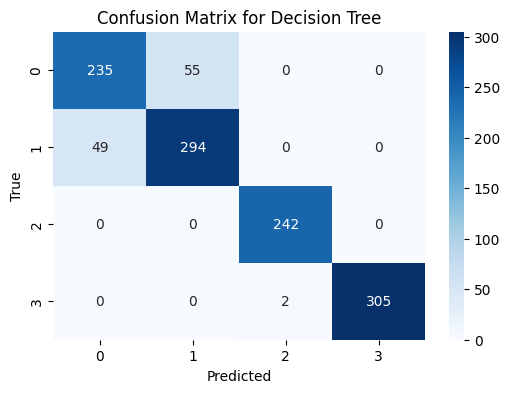

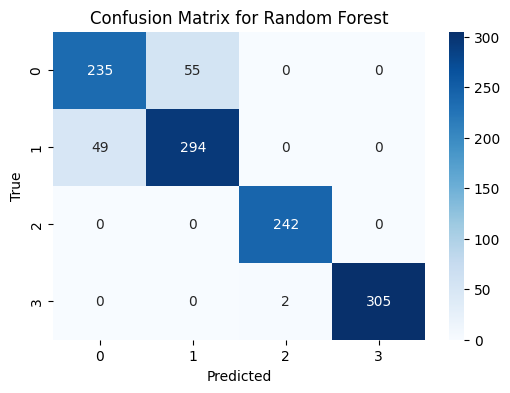

In [81]:
for i, model in enumerate(models):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix for {model_results['Model'][i]}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

Hasil evaluasi menunjukkan bahwa Random Forest jauh lebih baik dibandingkan Decision Tree.

**Decision Tree** : Akurasi hanya 54.99%, dengan precision dan recall yang rendah, menunjukkan model ini terlalu sederhana dan tidak mampu menangkap pola data dengan baik (underfitting).

**Random Forest** : Akurasi mencapai 91.03%, dengan metrik yang seimbang, menunjukkan bahwa model ini lebih baik dalam menangani kompleksitas data.

## **c. Tuning Model Klasifikasi (Optional)**

1. Menggunakan Random Search untuk model Decision Tree

In [82]:
param_dist_dt = {
    'max_depth': [1, 3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
}

random_search_dt = RandomizedSearchCV(DecisionTreeClassifier(random_state=0), param_dist_dt, n_iter=10, cv=5, random_state=42, scoring='accuracy')
random_search_dt.fit(X_train, y_train)

print("Best parameters for Decision Tree:", random_search_dt.best_params_)
print("Best cross-validation score for Decision Tree:", random_search_dt.best_score_)

best_dt_random = random_search_dt.best_estimator_
dt_test_score_random = best_dt_random.score(X_test, y_test)
print("Test set score for Decision Tree (RandomizedSearch):", dt_test_score_random)

Best parameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': None}
Best cross-validation score for Decision Tree: 1.0
Test set score for Decision Tree (RandomizedSearch): 1.0


2. Menggunakan Random Search untuk model Random Forest

In [83]:
param_dist_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
}

random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=0), param_dist_rf, n_iter=10, cv=5, random_state=42, scoring='accuracy')
random_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", random_search_rf.best_params_)
print("Best cross-validation score for Random Forest:", random_search_rf.best_score_)

best_rf_random = random_search_rf.best_estimator_
rf_test_score_random = best_rf_random.score(X_test, y_test)
print("Test set score for Random Forest (RandomizedSearch):", rf_test_score_random)

Best parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_depth': None}
Best cross-validation score for Random Forest: 1.0
Test set score for Random Forest (RandomizedSearch): 1.0


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

In [84]:
# Hasil evaluasi untuk Decision Tree dan Random Forest setelah tuning
y_pred_dt = best_dt_random.predict(X_test)
y_pred_rf = best_rf_random.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

model_results = {
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_dt, accuracy_rf],
    'Precision': [precision_dt, precision_rf],
    'Recall': [recall_dt, recall_rf],
    'F1-Score': [f1_dt, f1_rf]
}

df_metrics = pd.DataFrame(model_results)
df_metrics


,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,1.0,1.0,1.0,1.0
1,Random Forest,1.0,1.0,1.0,1.0


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

1. Perbandingan hasil evaluasi sebelum dan sesudah :
   - Sebelum tuning, Random Forest sudah menunjukkan performa yang sangat baik (91%), sedangkan Decision Tree cenderung lebih buruk, dengan nilai yang lebih rendah di semua metrik.
   - Setelah tuning, kedua model menunjukkan performa sempurna (1.0 di semua metrik). Namun, ini menunjukkan kemungkinan overfitting, karena model sangat baik di data pelatihan namun bisa jadi tidak mampu generalisasi pada data baru.

2. Identifikasi kelemahan model :
   Setelah tuning, meskipun kedua model (Decision Tree dan Random Forest) menunjukkan hasil nilai yang sempurna (1.0) di semua metrik, tetapi hal tersebut bisa saja menunjukkan bahwa model mengalami overfitting. Model terlalu menyesuaikan diri dengan data pelatihan dan kemungkinan tidak akan bekerja dengan baik pada data baru.

3. Rekomendasi :
   - Mungkin bisa mengumpulkan data lebih banyak dan lebih beragam untuk membantu model generalisasi.
   - Mencoba tuning hyperparameter lebih lanjut atau algoritma lain seperti SVM atau Gradient Boosting untuk hasil yang lebih stabil.